# Import libraries

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# always make it pretty 
plt.style.use('ggplot')

## Import our libraries

In [12]:
from practicum_utils import get_loggi_files, global_connect, run_query, explained_time, careful_query

# Connect to configured DB

In [13]:
db = global_connect()

# Ready to query the DB

In [27]:
careful_query('select min(created) as first_itinerary from itineraries where distribution_center1 = 1')

,first_itinerary
0,2019-10-01 07:31:00


In [28]:
careful_query('select min(created) as first_itinerary from itineraries where distribution_center1 = 2')

,first_itinerary
0,2019-12-11 05:33:00


In [14]:
df_av1 = careful_query("""
SELECT DATE(a.sent) as date, count(distinct(i.itinerary_id)) as itineraries
FROM itineraries i
INNER JOIN availabilities a ON i.itinerary_id = a.itinerary_id
WHERE sent > '2019-10-01' AND distribution_center=1
GROUP BY DATE(a.sent)
""", 200000)

In [15]:
df_av1['date'] = pd.to_datetime(df_av1['date'])
df_av1.set_index(df_av1['date'], drop=True, inplace=True)

In [16]:
df_av1.head()

,date,itineraries
date,,
2019-12-17,2019-12-17,4
2019-12-18,2019-12-18,84
2019-12-19,2019-12-19,67
2019-12-20,2019-12-20,97
2019-12-21,2019-12-21,65


Here we see that there is no itineraries data of agency 1 in availabilities dataset from 2019-10-01 to 2019-12-16, and just 4 itineraries on december 17 th.

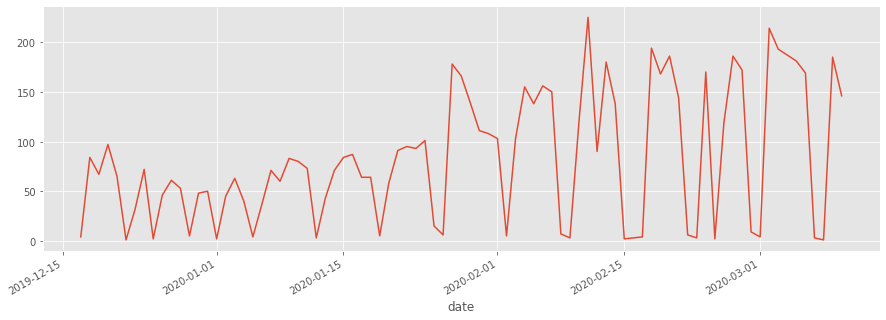

In [17]:
df_av1['itineraries'].plot(figsize=(15,5));

In [18]:
df_av2 = careful_query("""
SELECT DATE(a.sent) as date, count(distinct(a.itinerary_id)) as itineraries
FROM itineraries i
INNER JOIN availabilities a ON i.itinerary_id = a.itinerary_id
WHERE sent > '2019-10-01' AND distribution_center=2
GROUP BY DATE(a.sent)
""", 250000)

In [19]:
df_av2['date'] = pd.to_datetime(df_av2['date'])
df_av2.set_index(df_av2['date'], drop=True, inplace=True)

In [20]:
df_av2.head()

,date,itineraries
date,,
2019-12-17,2019-12-17,30
2019-12-18,2019-12-18,196
2019-12-19,2019-12-19,169
2019-12-20,2019-12-20,168
2019-12-21,2019-12-21,126


Here we see that there is no itineraries data of agency 2 in availabilities dataset from 2019-12-11 to 2019-12-16, and just 30 itineraries on december 17 th. The truncated data correspond to just a few days.

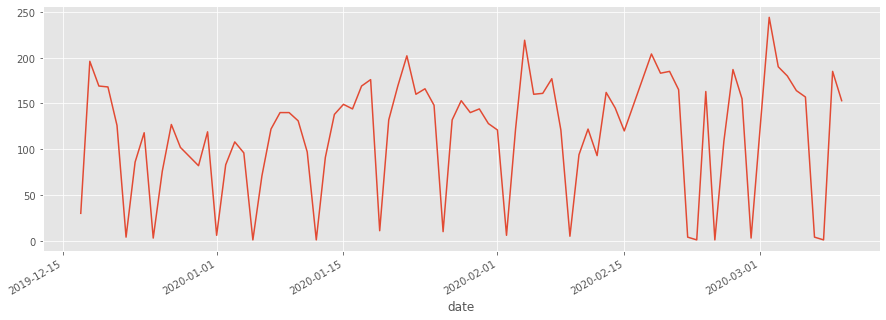

In [21]:
df_av2['itineraries'].plot(figsize=(15,5));

## Plot agency 1 itineraries counts per hour
Using different itinerary fields

In [74]:
df = pd.DataFrame({'hh' : [i for i in range(24)]})
for col in ['created', 'accepted', 'dropped', 'started', 'finished']:

    df_a1 = careful_query("""
        SELECT EXTRACT(HOUR FROM {0}) AS hh,
               COUNT(1) AS {0}
        FROM itineraries
        WHERE distribution_center1=1
        AND {0} IS NOT NULL
        GROUP BY hh
        ORDER BY hh
        """.format(col))

    df_a1['hh'] = df_a1['hh'].astype('int') 
    df_a1.set_index('hh', inplace=True)

    df = pd.concat([df, df_a1], axis=1)

del df['hh']

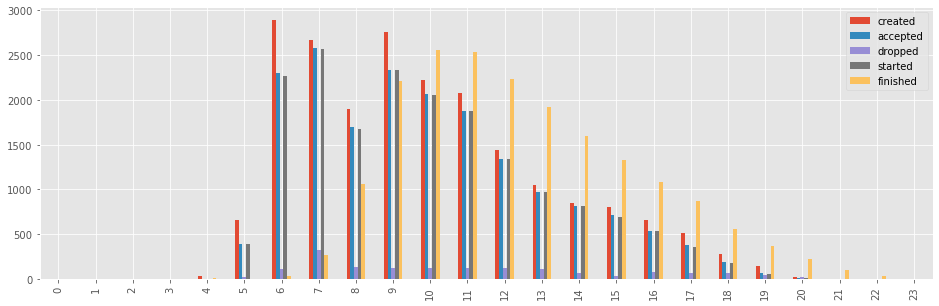

In [75]:
df.plot.bar(figsize=(16,5));